<a href="https://colab.research.google.com/github/farahanany/DiabetesPrediction/blob/main/ANN_PIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
file_path = '/content/drive/My Drive/diabetes.csv'
data = pd.read_csv(file_path)


In [ ]:
data.shape

(768, 9)

In [ ]:
bmi_med = data['BMI'].median()
data['BMI'] = data['BMI'].replace(to_replace=0, value=bmi_med)

bp_med = data['BloodPressure'].median()
data['BloodPressure'] = data['BloodPressure'].replace(to_replace=0, value=bp_med)

glu_med = data['Glucose'].median()
data['Glucose'] = data['Glucose'].replace(to_replace=0, value=glu_med)

skin_med = data['SkinThickness'].median()
data['SkinThickness'] = data['SkinThickness'].replace(to_replace=0, value=skin_med)

in_med = data['Insulin'].median()
data['Insulin'] = data['Insulin'].replace(to_replace=0, value=in_med)


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [ ]:
X=data.drop('Outcome',axis=1).values ##independent features
y=data['Outcome'].values #dependnet fetaures

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [ ]:
#Libraries from PyTorch
import torch
import torch.nn  as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)  # Converting to long tensor for CrossEntropyLoss
y_test = torch.LongTensor(y_test)

In [ ]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super(ANN_Model, self).__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [ ]:
# Creating an instance of the model
model = ANN_Model()

# Setting random seed for reproducibility
torch.manual_seed(20)

# Loss function
loss_function = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Training
epochs = 500
final_losses = []

for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    y_pred = model(X_train)

    # Calculate loss
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print("Epoch number: {} and the loss: {:.4f}".format(epoch + 1, loss.item()))

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

Epoch number: 10 and the loss: 0.9362
Epoch number: 20 and the loss: 0.6811
Epoch number: 30 and the loss: 0.6123
Epoch number: 40 and the loss: 0.5884
Epoch number: 50 and the loss: 0.5739
Epoch number: 60 and the loss: 0.5649
Epoch number: 70 and the loss: 0.5570
Epoch number: 80 and the loss: 0.5504
Epoch number: 90 and the loss: 0.5450
Epoch number: 100 and the loss: 0.5403
Epoch number: 110 and the loss: 0.5359
Epoch number: 120 and the loss: 0.5323
Epoch number: 130 and the loss: 0.5289
Epoch number: 140 and the loss: 0.5258
Epoch number: 150 and the loss: 0.5228
Epoch number: 160 and the loss: 0.5199
Epoch number: 170 and the loss: 0.5168
Epoch number: 180 and the loss: 0.5136
Epoch number: 190 and the loss: 0.5104
Epoch number: 200 and the loss: 0.5072
Epoch number: 210 and the loss: 0.5043
Epoch number: 220 and the loss: 0.5015
Epoch number: 230 and the loss: 0.4994
Epoch number: 240 and the loss: 0.4975
Epoch number: 250 and the loss: 0.4957
Epoch number: 260 and the loss: 0.

In [ ]:
#plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

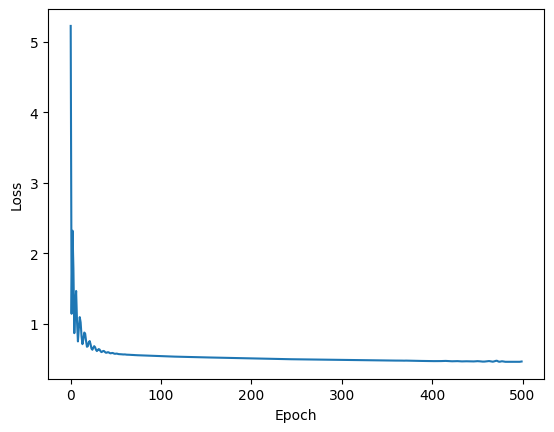

In [ ]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
1
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0


In [ ]:
from sklearn.metrics  import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[144,  13],
       [ 41,  33]])

Text(95.72222222222221, 0.5, 'Predicted Values')

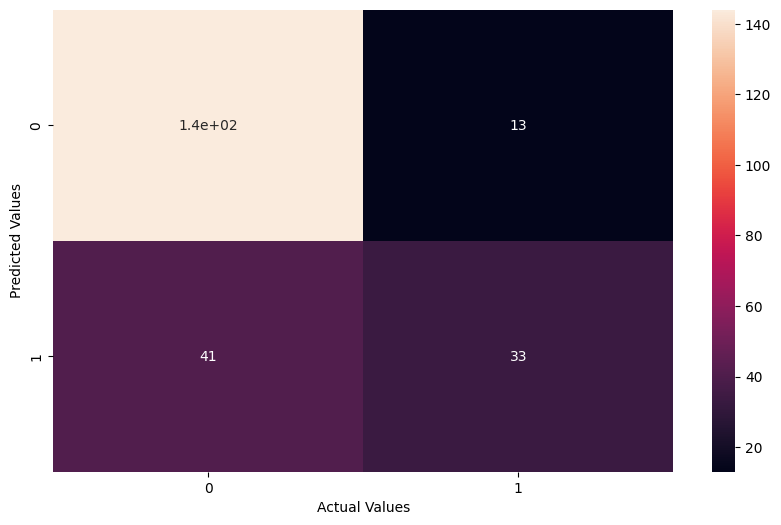

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7662337662337663

In [ ]:
#save model
torch.save(model,'diabetes.pt')

In [ ]:
model=torch.load('diabetes.pt')

In [ ]:
model.eval()
new_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50],  # Feature values for a single data point
                     [1, 85, 66, 29, 0, 26.6, 0.351, 31],   # Another data point
                     [8, 183, 64, 0, 0, 23.3, 0.672, 32],   # Yet another data point
                     [1, 89, 66, 23, 94, 28.1, 0.167, 21]]) # And another data point
new_data_tensor = torch.tensor(new_data, dtype=torch.float32)


In [ ]:
with torch.no_grad():
    predictions = model(new_data_tensor)

In [ ]:
import torch.nn.functional as F

# Apply softmax to get probabilities (assuming predictions are logits)
predictions_probs = F.softmax(predictions, dim=1)

# Now, predictions_probs contains the probabilities for each class for each data point


In [ ]:
import numpy as np

# Convert predictions from tensor to NumPy array
predictions_numpy = predictions.numpy()

# Now you can print or use the predictions as needed
print(predictions_numpy)

# For example, if you're dealing with classification, you might want to extract the predicted class labels
predicted_labels = np.argmax(predictions_numpy, axis=1)
print(predicted_labels)


[[-4.9007916   2.418738  ]
 [-2.59697     0.72917867]
 [-2.0032442   2.787766  ]
 [ 5.176603    3.4857893 ]]
[1 1 1 0]


In [ ]:
!pip install ann_visualizer
!pip install graphviz


In [ ]:
!pip install torchviz
from torchviz import make_dot
from IPython.display import Image



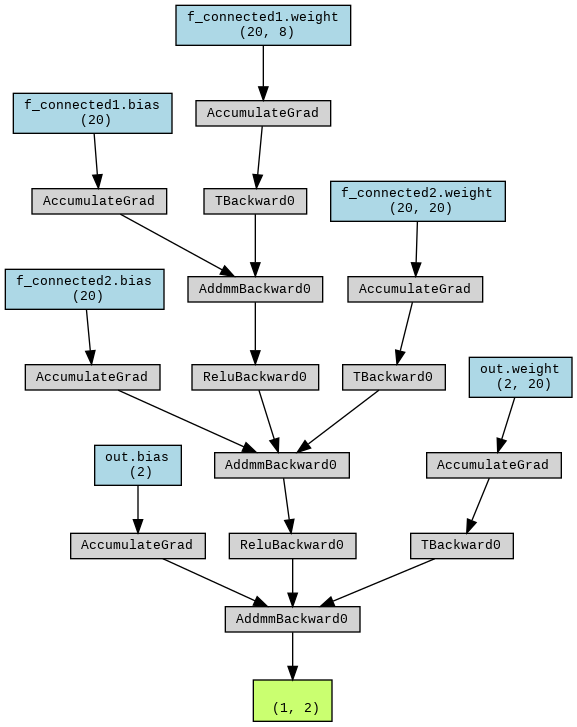

In [ ]:
# Visualize the model using torchviz
from torchviz import make_dot

dummy_input = torch.randn(1, 8)
viz = make_dot(model(dummy_input), params=dict(model.named_parameters()))

# Save the graph to a file and display it
viz.format = 'png'
viz.render('network')

# Display the image inline
Image('network.png')